In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
import sys
sys.path.append("../../../")
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_nonlinear as compute_exp_val_nonlinear
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val_linear
from src.util import bath_correlation_function
from src.util import debye_spectral_density  
from src.homps import homps
from src.util import operators
from src.util import noise_generator

In [3]:
# Parameters for the spin-boson model
epsilon = 2.0
delta = -2.0
# Parameters for the Debye spectral density
beta = 50.0
T = 1/beta
gamma = 5.0
eta = 0.5
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
L = sigma_z
h = operators.generate_spin_boson_hamiltonian(delta=delta, epsilon=epsilon)
# time window
duration = 30

In [4]:
g, w = debye_spectral_density.get_debye_coefficients(5000, T, gamma, eta)

In [5]:
N_steps = 6000
N_trunc = 9
N_terms = 13

In [6]:
N = 10000
w_cut = 1000
J = lambda w : debye_spectral_density.debye_spectral_density(w, eta, gamma)

In [7]:
generator = noise_generator.ColoredNoiseGenerator_SumApprox(J, 0, duration, N, w_cut, beta)

In [8]:
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'RK4',
    'chi_max' : 10,
    'eps' : 1.e-3,
    'noise_generator' : generator,
    'rescale_aux' : True,
}

In [9]:
my_homps = homps.HOMPS_Engine(g[:N_terms], w[:N_terms], h, L, duration, N_steps, N_trunc, options)

In [10]:
psis_100 = my_homps.compute_realizations(100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
sigma_zs_100 = compute_exp_val_nonlinear(psis_100, sigma_z)

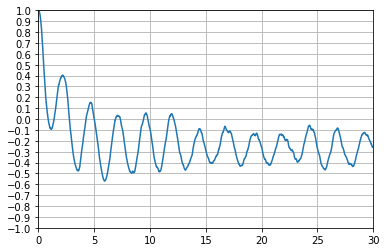

In [12]:
plt.plot(np.linspace(0, 30, N_steps), sigma_zs_100)
plt.ylim(-1, 1)
plt.yticks(np.linspace(-1.0, 1.0, 21))
plt.xlim(0, 30)
plt.grid()
plt.show()

## Using more memory terms

In [17]:
g, w = debye_spectral_density.get_debye_coefficients(5000, T, gamma, eta)

In [18]:
N_steps = 6000
N_trunc = 9
N_terms = 13
N_terms_memory = 4000

In [19]:
N = 10000
w_cut = 1000
J = lambda w : debye_spectral_density.debye_spectral_density(w, eta, gamma)

In [20]:
generator = noise_generator.ColoredNoiseGenerator_SumApprox(J, 0, duration, N, w_cut, beta)

In [21]:
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'RK4',
    'chi_max' : 10,
    'eps' : 1.e-3,
    'noise_generator' : generator,
    'rescale_aux' : True,
    'g_memory' : g[:N_terms_memory],
    'w_memory' : w[:N_terms_memory],
}

In [22]:
my_homps = homps.HOMPS_Engine(g[:N_terms], w[:N_terms], h, L, duration, N_steps, N_trunc, options)

In [23]:
psis_100 = my_homps.compute_realizations(100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [24]:
sigma_zs_100 = compute_exp_val_nonlinear(psis_100, sigma_z)

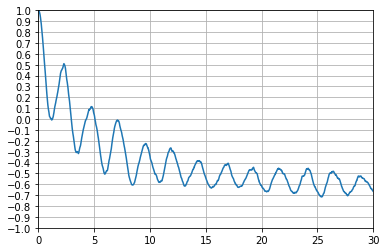

In [25]:
plt.plot(np.linspace(0, 30, N_steps), sigma_zs_100)
plt.ylim(-1, 1)
plt.yticks(np.linspace(-1.0, 1.0, 21))
plt.xlim(0, 30)
plt.grid()
plt.show()